In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import glob

In [2]:
datos = pd.read_csv("../data/processed/mediciones.csv",index_col=0,parse_dates=True)
datos.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:10:00',
               '2019-01-01 00:20:00', '2019-01-01 00:30:00',
               '2019-01-01 00:40:00', '2019-01-01 00:50:00',
               '2019-01-01 01:00:00', '2019-01-01 01:10:00',
               '2019-01-01 01:20:00', '2019-01-01 01:30:00',
               ...
               '2019-12-06 22:20:00', '2019-12-06 22:30:00',
               '2019-12-06 22:40:00', '2019-12-06 22:50:00',
               '2019-12-06 23:00:00', '2019-12-06 23:10:00',
               '2019-12-06 23:20:00', '2019-12-06 23:30:00',
               '2019-12-06 23:40:00', '2019-12-06 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=48960, freq=None)

<AxesSubplot:xlabel='tiempo'>

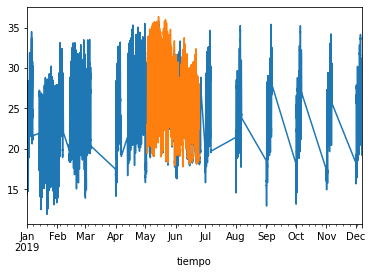

In [3]:
datos.To_ruoa.plot()
datos.To_esolmet.plot()

In [4]:
archivo = '../data/processed/C_za.csv'
def importa(archivo):
    tmp = pd.read_csv(archivo,index_col=0,parse_dates=True)
    tmp = tmp.add_suffix("_"+archivo[20:22])
    return tmp
tmp = importa(archivo)
tmp.index

DatetimeIndex(['2019-05-03 00:10:00', '2019-05-03 00:20:00',
               '2019-05-03 00:30:00', '2019-05-03 00:40:00',
               '2019-05-03 00:50:00', '2019-05-03 01:00:00',
               '2019-05-03 01:10:00', '2019-05-03 01:20:00',
               '2019-05-03 01:30:00', '2019-05-03 01:40:00',
               ...
               '2019-06-24 22:30:00', '2019-06-24 22:40:00',
               '2019-06-24 22:50:00', '2019-06-24 23:00:00',
               '2019-06-24 23:10:00', '2019-06-24 23:20:00',
               '2019-06-24 23:30:00', '2019-06-24 23:40:00',
               '2019-06-24 23:50:00', '2019-06-24 23:59:59'],
              dtype='datetime64[ns]', name='tiempo', length=7632, freq=None)

In [5]:
archivos = glob.glob("../data/processed/C_*")
casos = [importa(archivo) for archivo in archivos]
casos = pd.concat(casos,axis=1)
# casos

In [6]:
# datos.columns

<AxesSubplot:xlabel='tiempo'>

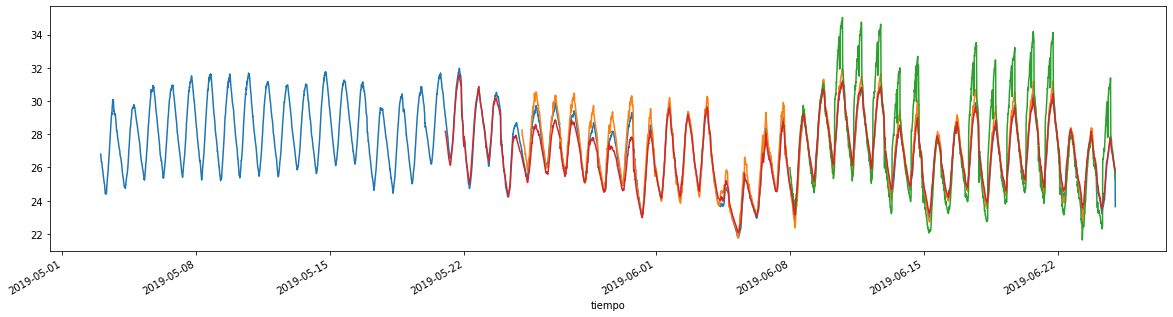

In [7]:
casos.Ti_za.plot(figsize=(20,5))
casos.Ti_ca.plot()
casos.Ti_ae.plot()
casos.Ti_bm.plot()

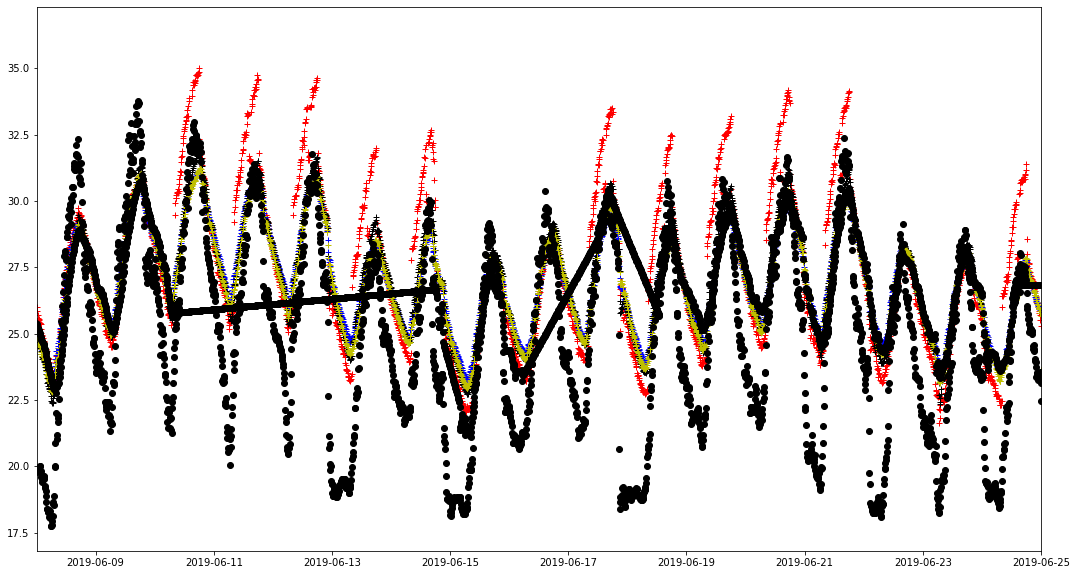

In [8]:
fig, ax = plt.subplots(figsize=(18,10))

fecha1 = parse("2019-06-08")
fecha2 = fecha1 + pd.Timedelta("17D")

ax.set_xlim(fecha1,fecha2)


ax.plot(casos.Ti_ae,'r+')
ax.plot(casos.Ti_bm,'b+')
ax.plot(casos.Ti_ca,'k+')
ax.plot(casos.Ti_za,'y+')

ax.plot(datos.Ti,'ko',linewidth=3)
# ax.plot(datos.To_ruoa  ,'go')
ax.plot(datos.To_esolmet,'ko')

# Definir fechas para trabajar, fines de semana entre las fechas 2019-06-09  y 2019-06-25

In [9]:
casos = casos["2019-06-09":"2019-06-25"]
casos = casos[casos.index.dayofweek>4]

datos = datos["2019-06-09":"2019-06-25"]
datos = datos[datos.index.dayofweek>4]


In [10]:
casos.index.dayofweek

Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='tiempo', length=725)

<AxesSubplot:xlabel='tiempo'>

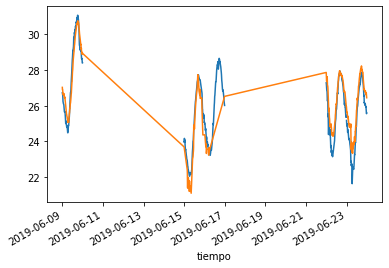

In [11]:
casos.Ti_ae.plot()
datos.Ti.plot()

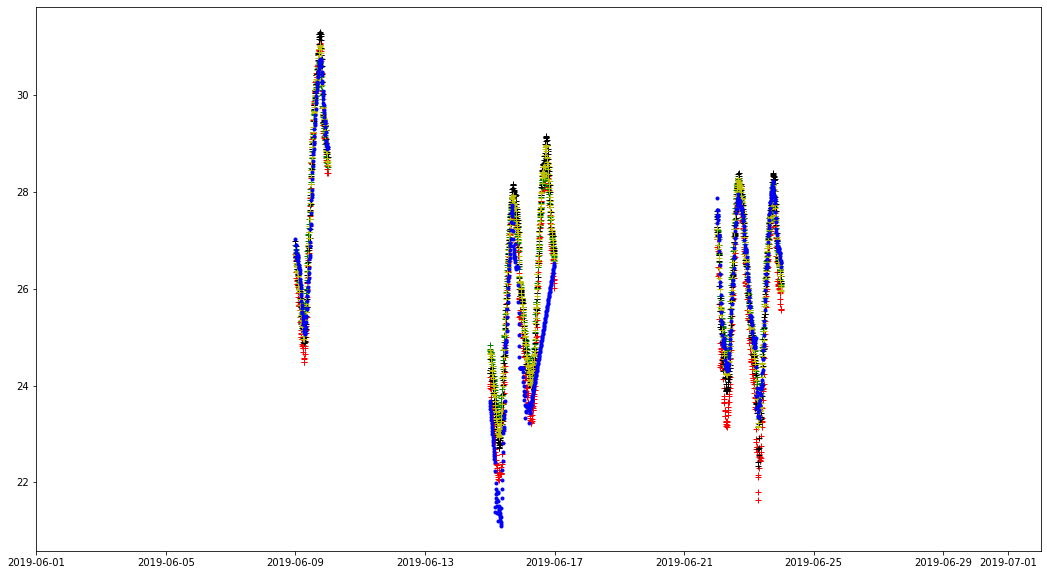

In [12]:
fig, ax = plt.subplots(figsize=(18,10))

fecha1 = parse("2019-06-01")
fecha2 = fecha1 + pd.Timedelta("31D")

ax.set_xlim(fecha1,fecha2)


ax.plot(casos.Ti_ae,'r+')
ax.plot(casos.Ti_bm,'g+')
ax.plot(casos.Ti_ca,'k+')
ax.plot(casos.Ti_za,'y+')

ax.plot(datos.Ti,'b.',linewidth=4)
# ax.plot(datos.To_ruoa  ,'go')
# ax.plot(datos.To_esolmet,'ko')
#se ve que el d'ia 2019-06-16 se debe tirar

In [13]:
casos.drop(casos.loc["2019-06-16"].index,inplace=True)
datos.drop(datos.loc["2019-06-16"].index,inplace=True)

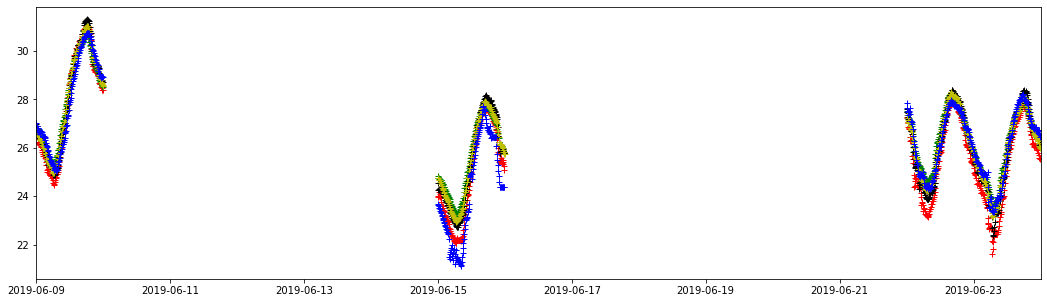

In [14]:
fig, ax = plt.subplots(figsize=(18,5))

fecha1 = parse("2019-06-09")
fecha2 = fecha1 + pd.Timedelta("15D")

ax.set_xlim(fecha1,fecha2)


ax.plot(casos.Ti_ae,'r+')
ax.plot(casos.Ti_bm,'g+')
ax.plot(casos.Ti_ca,'k+')
ax.plot(casos.Ti_za,'y+')

ax.plot(datos.Ti,'b+',linewidth=4)
# ax.plot(datos.To_ruoa  ,'go')
# ax.plot(datos.To_esolmet,'ko')
#se ve que el d'ia 2019-06-16 se debe tirar

In [15]:
#tirar los nans
# casos.dropna(inplace=True)
# datos.dropna(inplace=True)

In [17]:
todos = pd.concat([casos.Ti_ae,casos.Ti_bm,casos.Ti_ca,casos.Ti_za,datos.Ti,datos.To_esolmet],axis=1)
todos

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti,To_esolmet
tiempo,,,,,,
2019-06-09 00:00:00,26.724898,26.905373,26.978526,NaN,27.028997,23.56
2019-06-09 00:10:00,26.665128,26.821598,26.882885,26.725280,26.900937,23.52
2019-06-09 00:20:00,26.649338,26.792661,26.733839,26.705504,26.905551,23.75
2019-06-09 00:30:00,26.584348,26.757332,26.681603,26.645700,26.800565,23.74
2019-06-09 00:40:00,26.356539,26.694438,26.646719,26.535329,26.730189,23.55
...,...,...,...,...,...,...
2019-06-23 23:20:00,25.688748,26.193661,26.354532,26.180776,26.729035,23.39
2019-06-23 23:30:00,25.588972,26.125299,26.263217,26.079292,26.567517,23.33
2019-06-23 23:40:00,25.554791,26.090216,26.156561,26.029396,26.530599,23.49


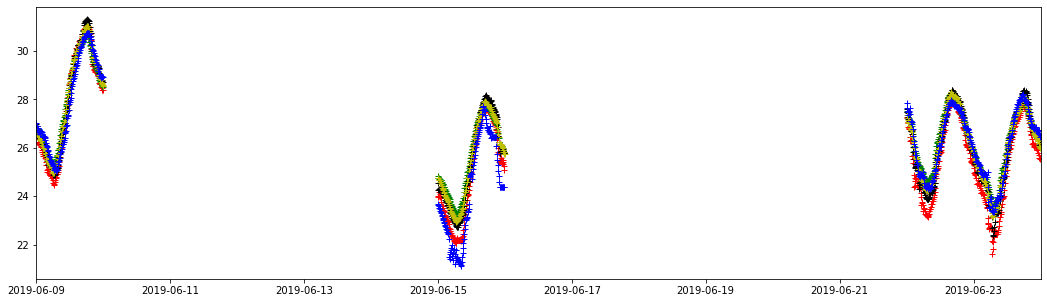

In [18]:
fig, ax = plt.subplots(figsize=(18,5))

fecha1 = parse("2019-06-09")
fecha2 = fecha1 + pd.Timedelta("15D")

ax.set_xlim(fecha1,fecha2)


ax.plot(todos.Ti_ae,'r+')
ax.plot(todos.Ti_bm,'g+')
ax.plot(todos.Ti_ca,'k+')
ax.plot(todos.Ti_za,'y+')

ax.plot(todos.Ti,'b+',linewidth=4)
# ax.plot(datos.To_ruoa  ,'go')
# ax.plot(datos.To_esolmet,'ko')

In [19]:
len(todos)

580

In [20]:
todos.dropna(inplace=True)

In [21]:
len(todos)

572

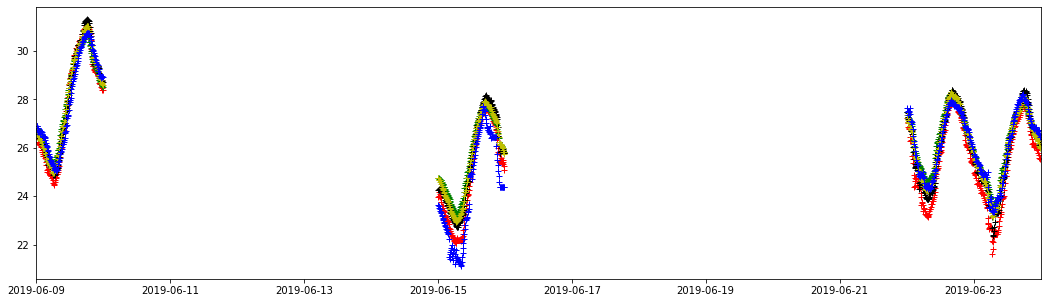

In [22]:
fig, ax = plt.subplots(figsize=(18,5))

fecha1 = parse("2019-06-09")
fecha2 = fecha1 + pd.Timedelta("15D")

ax.set_xlim(fecha1,fecha2)


ax.plot(todos.Ti_ae,'r+')
ax.plot(todos.Ti_bm,'g+')
ax.plot(todos.Ti_ca,'k+')
ax.plot(todos.Ti_za,'y+')

ax.plot(todos.Ti,'b+',linewidth=4)

In [23]:
todos.to_csv("../data/metrics/todos.csv")